# Ford GoBike System Data
## by Abdulaziz Alqumayzi

### Table of contents 
- [Introduction](#intro)
- [Preliminary Wrangling](#prewran)
- [Univariate Exploration](#univar)
- [Bivariate Explorationn](#bivar)
- [Multivariate Exploration](#multivar)
- [References](#ref)


<a id='intro'></a>
## Introduction

Bay Wheels is a regional public bicycle sharing system in California's San Francisco Bay Area. It is operated by Motivate in a partnership with the Metropolitan Transportation Commission and the Bay Area Air Quality Management District. Bay Wheels is the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States. It was established as Bay Area Bike Share in August 2013. As of January 2018, the Bay Wheels system had over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose.

In June 2017 the system was officially re-launched as Ford GoBike in a partnership with Ford Motor Company. After Motivate's acquisition by Lyft, the system was renamed to Bay Wheels in June 2019. The system is expected to expand to 7,000 bicycles around 540 stations in San Francisco, Oakland, Berkeley, Emeryville, and San Jose.

<a id='prewang'></a>
## Preliminary Wrangling

This dataset includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
gobike = pd.read_csv('202003-baywheels-tripdata.csv')

In [3]:
# high-level overview of data shape and composition
print('Number of rows and columns: {}'.format(gobike.shape))
print('Data types: \n{}'.format(gobike.dtypes) )
gobike.head()

Number of rows and columns: (176799, 14)
Data types: 
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
rental_access_method        object
dtype: object


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method
0,35187,2020-03-31 20:42:10.0790,2020-04-01 06:28:37.8440,462.0,Cruise Terminal at Pier 27,37.804648,-122.402087,24.0,Spear St at Folsom St,37.789677,-122.390428,10982,Customer,NaN
1,14568,2020-03-31 22:45:25.5010,2020-04-01 02:48:13.7730,42.0,San Francisco City Hall (Polk St at Grove St),37.778650,-122.418230,370.0,Jones St at Post St,37.787327,-122.413278,12617,Customer,NaN
2,35990,2020-03-31 15:08:22.3310,2020-04-01 01:08:12.9900,391.0,1st St at Younger Ave,37.355030,-121.904436,397.0,Gish Rd at 1st St,37.361867,-121.909315,12812,Customer,NaN
3,1068,2020-03-31 23:55:00.4260,2020-04-01 00:12:49.0200,456.0,Arguello Blvd at Geary Blvd,37.781468,-122.458806,107.0,17th St at Dolores St,37.763015,-122.426497,12955,Customer,NaN
4,3300,2020-03-31 23:00:55.6410,2020-03-31 23:55:56.6110,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,24.0,Spear St at Folsom St,37.789677,-122.390428,13050,Customer,NaN


In [4]:
gobike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176799 entries, 0 to 176798
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             176799 non-null  int64  
 1   start_time               176799 non-null  object 
 2   end_time                 176799 non-null  object 
 3   start_station_id         110696 non-null  float64
 4   start_station_name       111349 non-null  object 
 5   start_station_latitude   176799 non-null  float64
 6   start_station_longitude  176799 non-null  float64
 7   end_station_id           111097 non-null  float64
 8   end_station_name         111794 non-null  object 
 9   end_station_latitude     176799 non-null  float64
 10  end_station_longitude    176799 non-null  float64
 11  bike_id                  176799 non-null  int64  
 12  user_type                176799 non-null  object 
 13  rental_access_method     114269 non-null  object 
dtypes: f

In [5]:
gobike.isna().sum()

duration_sec                   0
start_time                     0
end_time                       0
start_station_id           66103
start_station_name         65450
start_station_latitude         0
start_station_longitude        0
end_station_id             65702
end_station_name           65005
end_station_latitude           0
end_station_longitude          0
bike_id                        0
user_type                      0
rental_access_method       62530
dtype: int64

In [6]:
gobike.duplicated().sum()

0

In [7]:
gobike.user_type.unique()

array(['Customer', 'Subscriber'], dtype=object)

In [8]:
gobike.rental_access_method.unique()

array([nan, 'app', 'clipper'], dtype=object)

In [9]:
# Change data type for some of the columns 

# start_time and end_time to datetime 
gobike.start_time = pd.to_datetime(gobike.start_time)
gobike.end_time = pd.to_datetime(gobike.end_time)

# usre_type and rental_access_method to category type
gobike.user_type = gobike.user_type.astype('category')
gobike.rental_access_method = gobike.rental_access_method.astype('category')

# start_station_id, end_station_id and bike_id to string 
gobike.start_station_id = gobike.start_station_id.astype(str)
gobike.end_station_id = gobike.end_station_id.astype(str)
gobike.bike_id = gobike.bike_id.astype(str)

# test code
gobike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176799 entries, 0 to 176798
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             176799 non-null  int64         
 1   start_time               176799 non-null  datetime64[ns]
 2   end_time                 176799 non-null  datetime64[ns]
 3   start_station_id         176799 non-null  object        
 4   start_station_name       111349 non-null  object        
 5   start_station_latitude   176799 non-null  float64       
 6   start_station_longitude  176799 non-null  float64       
 7   end_station_id           176799 non-null  object        
 8   end_station_name         111794 non-null  object        
 9   end_station_latitude     176799 non-null  float64       
 10  end_station_longitude    176799 non-null  float64       
 11  bike_id                  176799 non-null  object        
 12  user_type       

In [10]:
gobike.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude
count,176799.000000,176799.000000,176799.000000,176799.000000,176799.000000
mean,861.590156,37.732506,-122.339595,37.731290,-122.335029
std,1528.143090,0.170476,0.336403,0.278159,0.788013
min,60.000000,0.000000,-122.513814,0.000000,-122.529747
25%,374.000000,37.763708,-122.421339,37.763848,-122.420377
50%,602.000000,37.776598,-122.403969,37.776598,-122.403234
75%,963.000000,37.789677,-122.390648,37.789747,-122.390648
max,84450.000000,37.880222,0.000000,37.995942,0.000000


### What is the structure of your dataset?

> This dataset contains information for one month. March, 2020. The dataset structure as follow: 
 
>Each trip is anonymized and includes:
- Trip Duration (seconds)
- Start Time and Date
- End Time and Date
- Start Station ID
- Start Station Name
- Start Station Latitude
- Start Station Longitude
- End Station ID
- End Station Name
- End Station Latitude
- End Station Longitude
- Bike ID
- User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)
- Rental Access Method (App or Clipper)

### What is/are the main feature(s) of interest in your dataset?

> I am very interested in user type and rental access method features.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think features that will help my investigation are (trip duration), (start station id) and (end station id).

<a id='univar'></a>
## Univariate Exploration



First, I will start with Trip Duration variable. 

C:\Users\Az\anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.


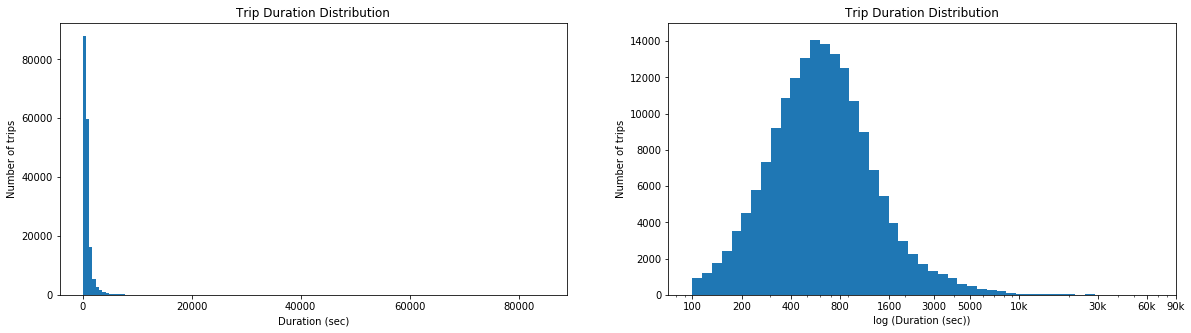

In [11]:
plt.figure(figsize=[20,5])

plt.subplot(1,2,1)
bins_edges = np.arange(0, gobike.duration_sec.max()+600 , 600)
plt.hist(data= gobike, x='duration_sec', bins = bins_edges)
plt.title('Trip Duration Distribution')
plt.xlabel('Duration (sec)')
plt.ylabel('Number of trips')

plt.subplot(1,2,2)
bins_edges_2 = 10 ** np.arange(2, np.log10(gobike.duration_sec.max())+0.06 , 0.06)
plt.hist(data= gobike, x='duration_sec', bins = bins_edges_2)
plt.xscale('log')
plt.xticks([100,200,400,800,1600,3e3,5e3,1e4,3e4,6e4,9e4],[100,200,400,800,1600,3000,5000,'10k','30k','60k','90k'])
plt.title('Trip Duration Distribution')
plt.xlabel('log (Duration (sec))')
plt.ylabel('Number of trips')
plt.axis([0, 90000, 0, 15000]);

On the left chart, I cannot get any insight from the chart so I worked a little bit on the graph to make a clean chart on the right graph.

The trip duration time is between 400 and 800 seconds.

Second, I will check the user type and rental access method variables.

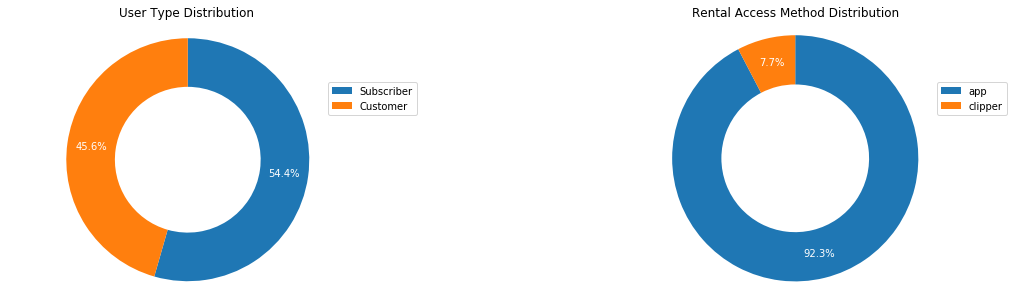

In [40]:
plt.figure(figsize=[20,5])

plt.subplot(1,2,1)
sorted_user = gobike.user_type.value_counts()
plt.pie(sorted_user, labels = sorted_user.index, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.4},autopct= '%1.1f%%',textprops={'color':'w'},pctdistance=0.8);
plt.axis('square')
plt.title('User Type Distribution')
plt.legend(sorted_user.index,  bbox_to_anchor = (1, 0.8))

plt.subplot(1,2,2)
sorted_rental = gobike.rental_access_method.value_counts()
plt.pie(sorted_rental, labels = sorted_rental.index, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.4},autopct= '%1.1f%%',textprops={'color':'w'}, pctdistance=0.8);
plt.axis('square')
plt.title('Rental Access Method Distribution')
plt.legend(sorted_rental.index,  bbox_to_anchor = (1, 0.8));

The chart on the left side shows that subscribers are the most of the users.

The chart on the right side shows that massive difference between the use of the app with respect to the clipper.

Next, I will check start and end station for the trips.

In [13]:
# I will make a copy to modify start and end station id null values
# I will make two copies because we may find some start stations but not end stations, and vice versa
gobike_start_id = gobike.copy()
gobike_end_id = gobike.copy()

In [14]:
# I will remove all null values from the column start_station _id 
# to check which stations that are the most visited to start the trip 
gobike_start_id = gobike_start_id.replace('nan',np.NaN)
gobike_start_id = gobike_start_id.dropna(subset=['start_station_id'])

# Test code
print('Number of null values: {}'.format(gobike_start_id.start_station_id.isnull().sum()))
gobike_start_id.start_station_id.value_counts()

Number of null values: 0


30.0     1910
58.0     1851
16.0     1446
81.0     1414
3.0      1306
         ... 
401.0       3
236.0       3
378.0       3
219.0       2
449.0       1
Name: start_station_id, Length: 443, dtype: int64

In [15]:
# Returned start_station_id to numeric data type to check the range of stations id  
gobike_start_id.start_station_id = gobike_start_id.start_station_id.astype(float)
gobike_start_id.start_station_id.describe()

count    110696.000000
mean        185.082261
std         154.647521
min           3.000000
25%          58.000000
50%         125.000000
75%         321.000000
max         521.000000
Name: start_station_id, dtype: float64

In [16]:
# The same procedure above, but for end_station_id 
gobike_end_id = gobike_end_id.replace('nan',np.NaN)
gobike_end_id = gobike_end_id.dropna(subset=['end_station_id'])

# Test code
print('Number of null values: {}'.format(gobike_end_id.end_station_id.isnull().sum()))
gobike_end_id.end_station_id.value_counts()

Number of null values: 0


30.0     2796
21.0     2024
58.0     1909
81.0     1527
3.0      1527
         ... 
401.0       5
229.0       5
300.0       5
236.0       4
228.0       3
Name: end_station_id, Length: 443, dtype: int64

In [17]:
# Returned end_station_id to numeric data type to check the range of stations id  
gobike_end_id.end_station_id = gobike_end_id.end_station_id.astype(float)
gobike_end_id.end_station_id.describe()

count    111097.000000
mean        179.244228
std         153.858017
min           3.000000
25%          53.000000
50%         121.000000
75%         309.000000
max         521.000000
Name: end_station_id, dtype: float64

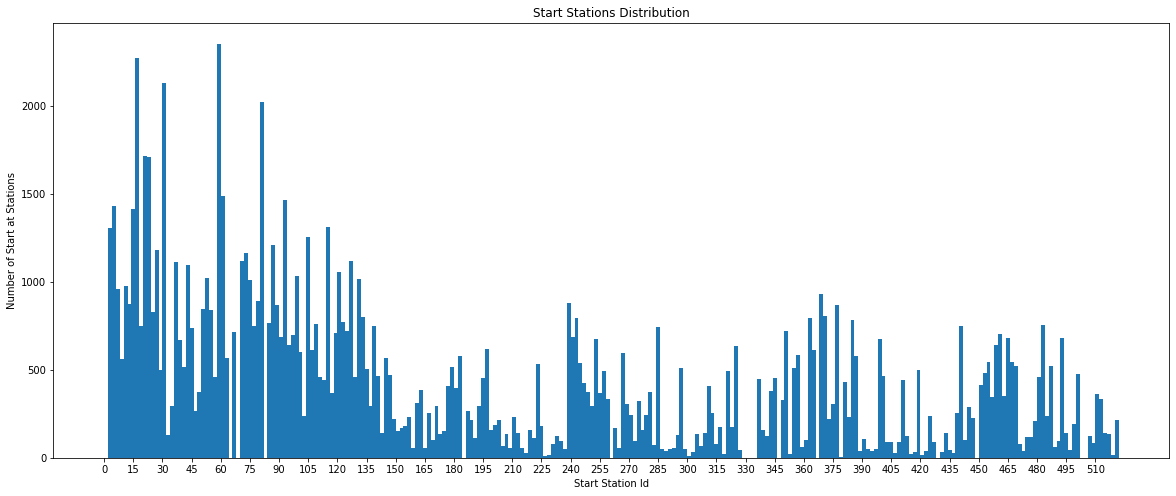

In [18]:
plt.figure(figsize=[20,8])

bins_edges_3 = np.arange(0, gobike_start_id.start_station_id.max()+2 ,2)
plt.hist(data=gobike_start_id, x='start_station_id',bins=bins_edges_3)
plt.title('Start Stations Distribution')
plt.xlabel('Start Station Id')
plt.ylabel('Number of Start at Stations')
plt.xticks(range(0,521,15));

Most start stations id are between the ranges 3 and 135 

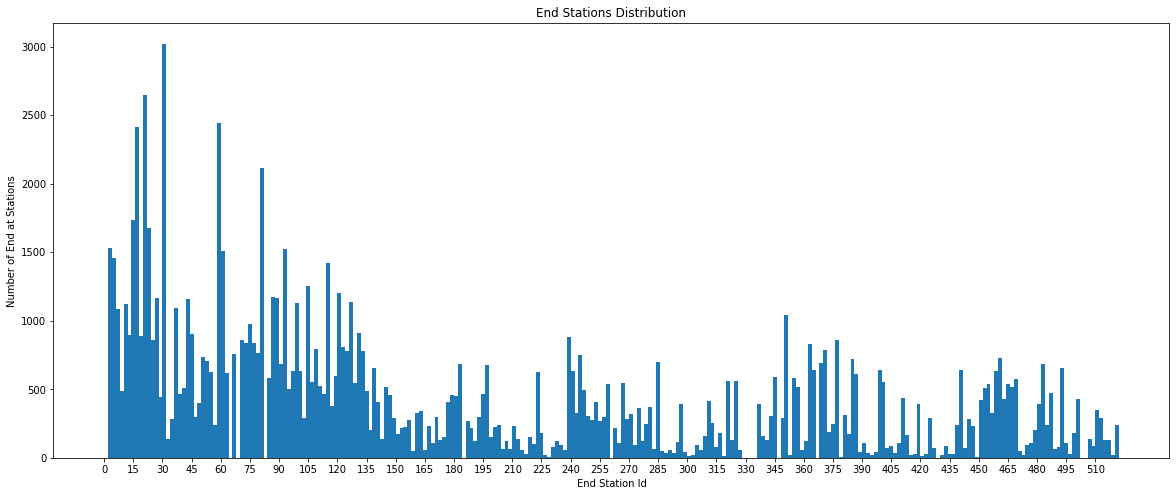

In [19]:
plt.figure(figsize=[20,8])

bins_edges_4 = np.arange(0, gobike_end_id.end_station_id.max()+2 ,2)
plt.hist(data=gobike_end_id, x='end_station_id',bins=bins_edges_4)
plt.title('End Stations Distribution')
plt.xlabel('End Station Id')
plt.ylabel('Number of End at Stations')
plt.xticks(range(0,521,15));

Most end stations id are also between the ranges 3 and 135

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The first variable `duratuion_sec` which shows total duration use of the bikes per second. I mention both graphs that before modifying and after. The first graph shows one insight, which is most of the duration used is below 20k seconds. But after digging deeper, I found that the second graph shows the most of the duration is below 1600 seconds.

> The second and third variables `user_type` and `rental_access_method`. 54.4% of the users are subscribers, and 45.6% of the users are customers. Very small difference but, you can use this insight to do some marketing for those that are not subscribers. For the third variable, the graph shows the massive use of the app with respect to the clipper. So, most of the focus should be on development of the app.

> The fourth and fifth variables `start_station_id` and `end_station_id` shows stations that people start from and end with.
the two graph shows most of the start and end of the stations are nearly the same. Stations id that is below id `150` is the most visited for both as start or end of the trip. Maybe due to work.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I changed the data types of some features. No other changes.

<a id='bivar'></a>
## Bivariate Exploration



In [20]:
# a new copy to add a new column (duration_minute)
gobike_min = gobike.copy()

In [21]:
gobike_min['duration_minute'] = gobike_min['duration_sec']/60
gobike_min.duration_minute = gobike_min.duration_minute.astype('int64')

gobike_min.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176799 entries, 0 to 176798
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             176799 non-null  int64         
 1   start_time               176799 non-null  datetime64[ns]
 2   end_time                 176799 non-null  datetime64[ns]
 3   start_station_id         176799 non-null  object        
 4   start_station_name       111349 non-null  object        
 5   start_station_latitude   176799 non-null  float64       
 6   start_station_longitude  176799 non-null  float64       
 7   end_station_id           176799 non-null  object        
 8   end_station_name         111794 non-null  object        
 9   end_station_latitude     176799 non-null  float64       
 10  end_station_longitude    176799 non-null  float64       
 11  bike_id                  176799 non-null  object        
 12  user_type       

In [22]:
gobike_min.duration_minute.describe()

count    176799.000000
mean         13.869965
std          25.469611
min           1.000000
25%           6.000000
50%          10.000000
75%          16.000000
max        1407.000000
Name: duration_minute, dtype: float64

In [23]:
gobike.duration_sec.describe()

count    176799.000000
mean        861.590156
std        1528.143090
min          60.000000
25%         374.000000
50%         602.000000
75%         963.000000
max       84450.000000
Name: duration_sec, dtype: float64

In [24]:
# quartile calculation for the variable duration_minute 
Q1 = gobike_min.duration_minute.quantile(0.25)
Q3 = gobike_min.duration_minute.quantile(0.75)
IQR = Q3 - Q1

print('First quartile:',Q1,'\nThird quartile:',Q3,'\nInterquartile range:',IQR)
print('Lower outlier:',Q1-1.5*IQR)
print('Upper outlier:',Q3+1.5*IQR)

First quartile: 6.0 
Third quartile: 16.0 
Interquartile range: 10.0
Lower outlier: -9.0
Upper outlier: 31.0


In [25]:
# quartile calculation for the variable duration_sec
q1 = gobike.duration_sec.quantile(0.25)
q3 = gobike.duration_sec.quantile(0.75)
iqr = q3 - q1

print('First quartile:',q1,'\nThird quartile:',q3,'\nInterquartile range:',iqr)
print('Lower outlier:',q1-1.5*iqr)
print('Upper outlier:',q3+1.5*iqr)

First quartile: 374.0 
Third quartile: 963.0 
Interquartile range: 589.0
Lower outlier: -509.5
Upper outlier: 1846.5


First, let's check duration time per minutes and seconds with user types

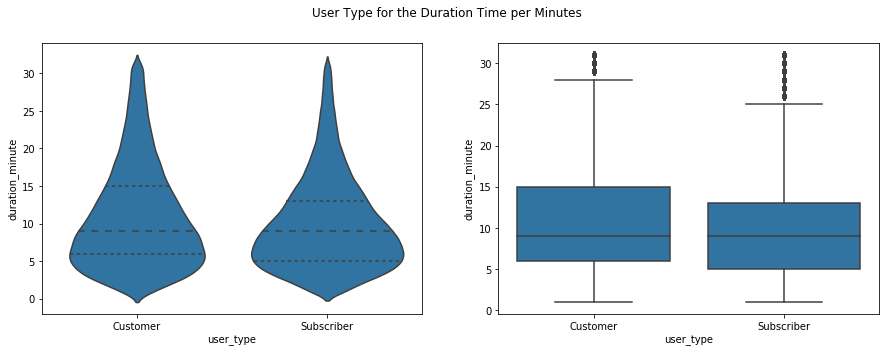

In [26]:
plt.figure(figsize = [15, 5])
plt.suptitle('User Type for the Duration Time per Minutes')


plt.subplot(1, 2, 1)
sb.violinplot(data = gobike_min.query('duration_minute <= 31'), x = 'user_type', y = 'duration_minute',
              color = sb.color_palette()[0],inner='quartile')

plt.subplot(1, 2, 2)
sb.boxplot(data = gobike_min.query('duration_minute <= 31'), x = 'user_type', y = 'duration_minute', 
           color = sb.color_palette()[0]);

In the two graphs above, we can see that most of the duration per minutes is about 5 minutes, for both Customer and Subscriber. 

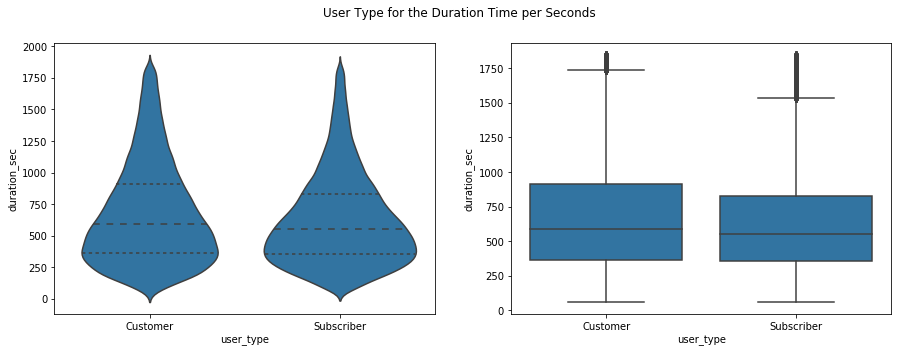

In [27]:
plt.figure(figsize = [15, 5])
plt.suptitle('User Type for the Duration Time per Seconds')

plt.subplot(1, 2, 1)
sb.violinplot(data = gobike.query('duration_sec <= 1846.5'), x = 'user_type', y = 'duration_sec',
              color = sb.color_palette()[0],inner='quartile')

plt.subplot(1, 2, 2)
sb.boxplot(data = gobike.query('duration_sec <= 1846.5'), x = 'user_type', y = 'duration_sec',  color = sb.color_palette()[0]);

As the previous graphs, but the duration in seconds. The duration is about 300 seconds.

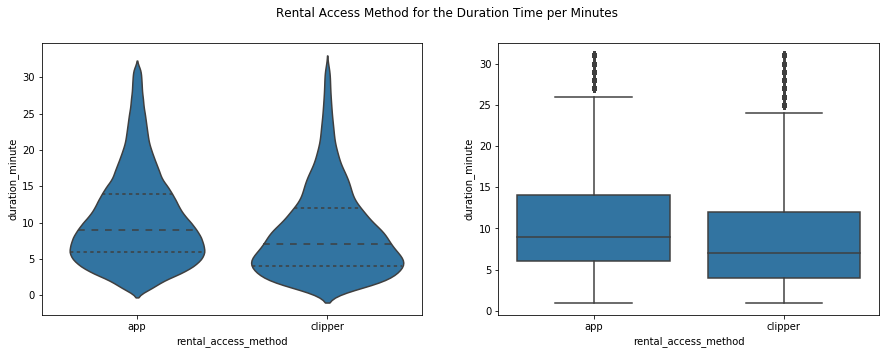

In [28]:
plt.figure(figsize = [15, 5])
plt.suptitle('Rental Access Method for the Duration Time per Minutes')


plt.subplot(1, 2, 1)
sb.violinplot(data = gobike_min.query('duration_minute <= 31'), x = 'rental_access_method', y = 'duration_minute',
              color = sb.color_palette()[0],inner='quartile')

plt.subplot(1, 2, 2)
sb.boxplot(data = gobike_min.query('duration_minute <= 31'), x = 'rental_access_method', y = 'duration_minute', 
           color = sb.color_palette()[0]);

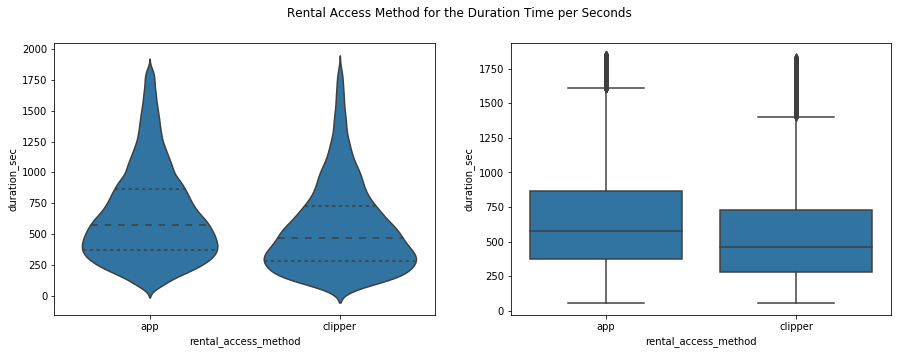

In [29]:
plt.figure(figsize = [15, 5])
plt.suptitle('Rental Access Method for the Duration Time per Seconds')

plt.subplot(1, 2, 1)
sb.violinplot(data = gobike.query('duration_sec <= 1846.5'), x = 'rental_access_method', y = 'duration_sec',
              color = sb.color_palette()[0],inner='quartile')

plt.subplot(1, 2, 2)
sb.boxplot(data = gobike.query('duration_sec <= 1846.5'), x = 'rental_access_method', y = 'duration_sec', 
           color = sb.color_palette()[0]);

It seems that no major difference in the duration of the access method. How are using the app, duration time is a little bit more than the clipper.

Next, I will check the user type variable with the rental access method variable.

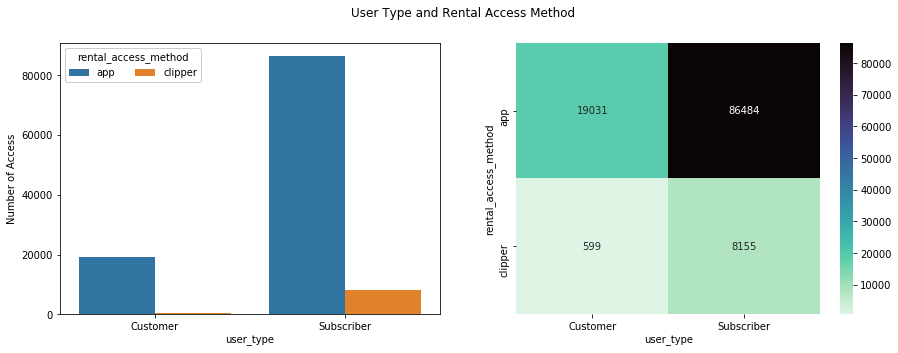

In [30]:
plt.figure(figsize = [15, 5])
plt.suptitle('User Type and Rental Access Method ')
plt.subplot(1, 2, 1)
ax = sb.countplot(data = gobike, x = 'user_type', hue = 'rental_access_method')
ax.legend(loc = 2, ncol = 3, framealpha = 1, title = 'rental_access_method')
plt.ylabel('Number of Access')

plt.subplot(1, 2, 2)
ct_counts = gobike.groupby(['user_type', 'rental_access_method']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index = 'rental_access_method', columns = 'user_type', values = 'count')
sb.heatmap(ct_counts, annot = True, fmt = 'd', cmap = 'mako_r');

The Two graphs above show clearly that the best method for both customers and subscribers prefer using the app.

Now let's move to duration variable with the start and end stations ID

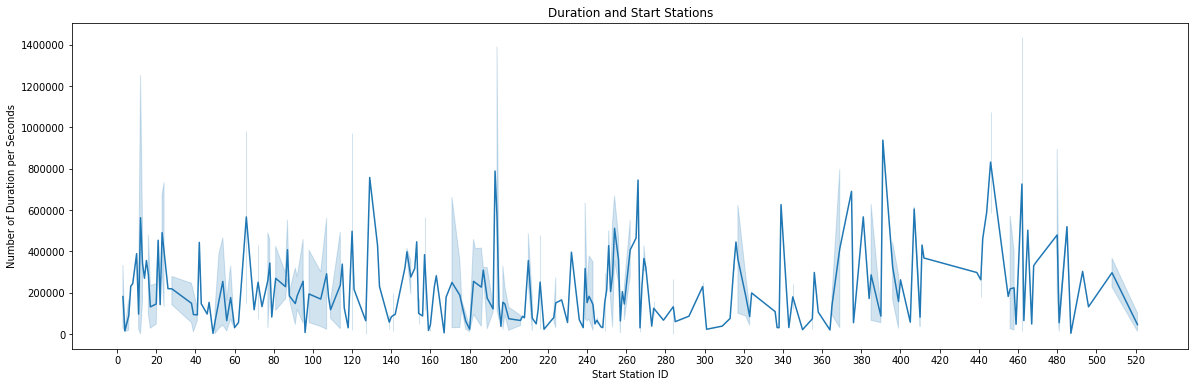

In [31]:
start_list =[]
start_ids = sorted(gobike_start_id.start_station_id.unique())
for x in start_ids:
    start_list.append(gobike_start_id[gobike_start_id.start_station_id == x].duration_sec.sum())
duration = pd.Series(start_list) 

plt.figure(figsize = [20, 6])
sb.lineplot(x = gobike_start_id.start_station_id, y = duration)
plt.title('Duration and Start Stations')
plt.xlabel('Start Station ID')
plt.ylabel('Number of Duration per Seconds')
plt.xticks(range(0, 521, 20));

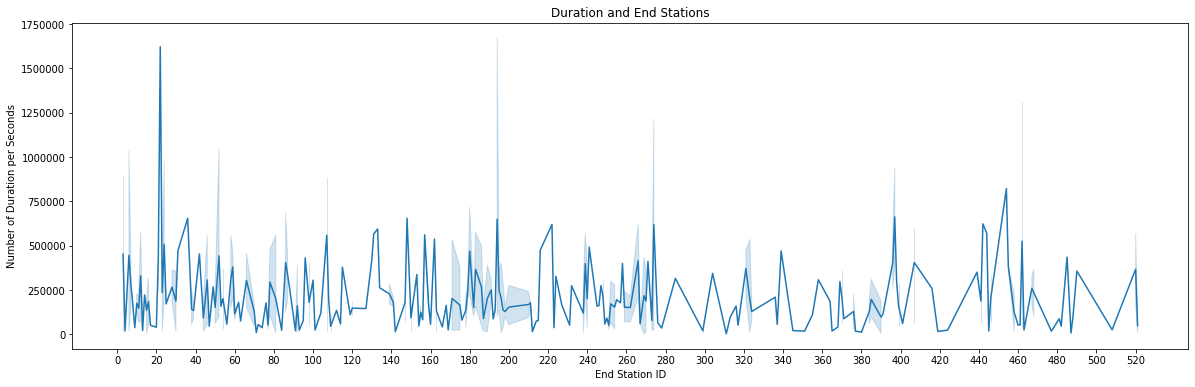

In [32]:
end_list =[]
end_ids = sorted(gobike_end_id.end_station_id.unique())
for x in end_ids:
    end_list.append(gobike_end_id[gobike_end_id.end_station_id == x].duration_sec.sum())
duration = pd.Series(end_list) 

plt.figure(figsize = [20, 6])
sb.lineplot(x = gobike_end_id.end_station_id, y = duration)
plt.title('Duration and End Stations')
plt.xlabel('End Station ID')
plt.ylabel('Number of Duration per Seconds')
plt.xticks(range(0, 521, 20));

From the two graphs above, we can see the duration time to start and end stations vary a lot. It is hard to get insight from the two graphs. But, it shows that some duration time in start stations higher than the end stations. Also, vice versa.  

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> I made a new column `duration_minute` to have good insight. 
Firstly, the first and second graphs, I compared the duration time per minute and seconds with the user type to check the relationships. I found that there is no difference in the duration time between the customer and subscribers. They seem to lookalike with little bit difference. But, the interesting thing is that customers are more using bikes than subscribers.

>Secondly, the third and fourth graphs, duration time between the use of rental access methods (app and clipper) are near to each other. But, with a small difference to the app. Patterns in the duration almost the same.

> Thirdly, the fifth graphs show the huge difference between the type of users in the access methods. The app is more clearly far away from the clipper, whether the user is a customer or subscriber. About 80 thousand is more for the subscribers and 18 thousand for the customers.

>Lastly, duration to start and end station graphs. The two graphs show no pattern to follow or get insight from. But, we can see which start stations result in long trips or which end stations result in long trips.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

>No, I didn't, It is a very interesting dataset to investigate, but it needs more time.

<a id='multivar'></a>
## Multivariate Exploration


In [33]:
# This copy for change data type of start_station_id and end_station_id variables to numeric 
gobike_start_end = gobike.copy()

In [34]:
gobike_start_end.start_station_id = gobike_start_end.start_station_id.astype(float)
gobike_start_end.end_station_id = gobike_start_end.end_station_id.astype(float)
gobike_start_end = gobike_start_end.dropna(subset=['start_station_id','end_station_id'])

In [35]:
print(gobike_start_end.start_station_id.isnull().sum())
gobike_start_end.end_station_id.isnull().sum()

0


0

I will start with user type with start and end stations

C:\Users\Az\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


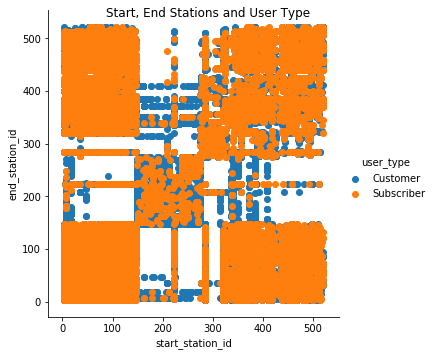

In [36]:
user_station = sb.FacetGrid(data = gobike_start_end, hue = 'user_type', size = 5)
user_station.map(plt.scatter, 'start_station_id', 'end_station_id')
user_station.add_legend()
user_station.fig.suptitle('Start, End Stations and User Type');

The graph is not useful to get valuable insights from it.

Second, I will check rantal methods with start and end stations

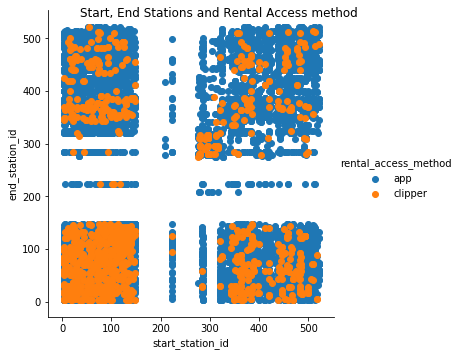

In [37]:
rental_station = sb.FacetGrid(data = gobike_start_end, hue = 'rental_access_method', size = 5)
rental_station.map(plt.scatter, 'start_station_id', 'end_station_id')
rental_station.add_legend()
rental_station.fig.suptitle('Start, End Stations and Rental Access method');

Again, the same pattern for the user type variable.

Let's move to the average of duration with user type and rental method.

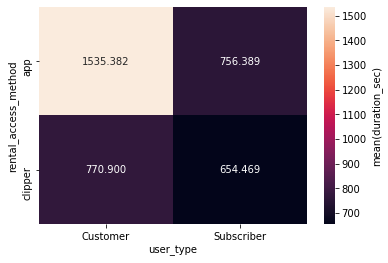

In [38]:
cat_means = gobike_start_end.groupby(['user_type', 'rental_access_method']).mean()['duration_sec']
cat_means = cat_means.reset_index(name = 'duration_sec')
cat_means = cat_means.pivot(index = 'rental_access_method', columns = 'user_type',
                            values = 'duration_sec')
sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(duration_sec)'});

The most interesting in the graph is that customers are more using bikes than subscribers! for both how to use the app or clipper. 

Now, I will investigate the start and end stations id with the user type and rental method.

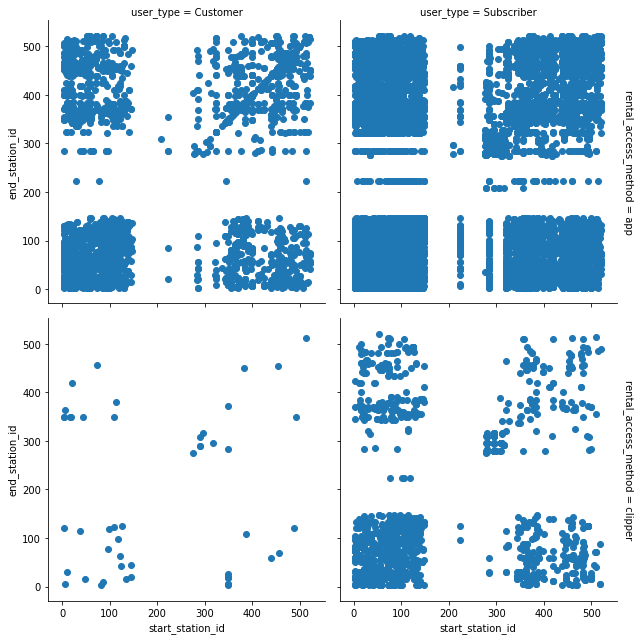

In [39]:
g = sb.FacetGrid(data = gobike_start_end, col = 'user_type', row = 'rental_access_method', size = 4.5,
                margin_titles = True)
g.map(plt.scatter, 'start_station_id', 'end_station_id');

These graphs show me that customers are hugely using the app than clippers to their trips. Also, Subscribers are more using the app than a clipper, But not as the huge difference in the customer type.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> In this part, especially in graph three. The duration time average is higher for the customer than the subscriber. Whether they are using the rental access method for the app or clipper. The average duration ride for a customer that using the app is 1535 and the who is using clipper is 770. For a subscriber, the average duration time for a ride and using the app is 756, and the who is using the clipper is 654. In the last graph, it shows that the app is preferable to make a rental for the bikes. We can see the huge difference between a customer using the app and that who didn't. Also, subscriber are more in using the app than the clipper rental method. 



### Were there any interesting or surprising interactions between features?

> What surprised me a lot is the customer duration time for a trip is double for subscribers that both using the app. Also, a huge difference between the customers who are started and ended their trip by using the app or clipper.

<a id='ref'></a>
## References 
[Ford GoBike](https://en.wikipedia.org/wiki/Bay_Wheels) system, which known now as a Bay Wheels